# Data Analysis and Visualization of Global Dataset of Cyber Incidents.

Source File choosen from https://eurepoc.eu/database/ - version 1.3 or https://zenodo.org/records/14965395

In [1]:
import pandas as pd

try:
    GCI_data_file = pd.read_excel('eurepoc_global_dataset_1_3.xlsx')
except FileNotFoundError:
    raise FileNotFoundError("The file 'eurepoc_global_dataset_1_3.xlsx' was not found. Please provide correct file path.")

columns_to_select = [
    "incident_id", "name", "description", "start_date", "end_date", 
    "incident_type", "receiver_country", "receiver_category", "receiver_subcategory", 
    "initiator_country", "initiator_category", "number_attributions", 
    "impact_indicator_label", "impact_indicator_score", "receiver_name", 
    "initiator_subcategory", "initiator_name"
]
GCI_df = GCI_data_file[columns_to_select]

Purpose of the Code
- Loading an Excel file (eurepoc_global_dataset_1_3.xlsx) into a Pandas DataFrame.
- Handling errors if the file is not found, ensuring correct file path provided.
- Selects specific columns to focus on relevant data for analysis.

Insights from the Code
- The dataset includes key columns like incident_id, incident_type, and receiver_country.
- Error handling ensures the script runs smoothly even if the file is missing.
- Selecting columns reduces memory usage and simplifies further analysis.

In [2]:
GCI_df.head()

,incident_id,name,description,start_date,end_date,incident_type,receiver_country,receiver_category,receiver_subcategory,initiator_country,initiator_category,number_attributions,impact_indicator_label,impact_indicator_score,receiver_name,initiator_subcategory,initiator_name
0,4163,Russian State-Sponsored Actors Linked to GRU ...,"On 19 December 2024, a cyber attack attributed...",19.12.2024,19.12.2024,Disruption;Hijacking with Misuse,Ukraine,State institutions / political system,Government / ministries,Russia,State,1,Low,8,Ministry of Justice (Ukraine),Not available,Unknown
1,4161,Unknown threat actors stole Microsoft Azure ac...,Unit 42 researchers uncovered a phishing campa...,01.06.2024,Not available,Data theft;Hijacking with Misuse,Germany;Germany;Germany;United Kingdom;United ...,Critical infrastructure;Corporate Targets (cor...,Chemicals;Not available;Critical Manufacturing...,Not attributed,Not attributed,1,Low,6,Not available;Not available;Not available;Not ...,Not available,Not attributed
2,4160,Unspecified US intelligence agencies stole tra...,The Chinese National Internet Emergency Respon...,01.05.2023,Not available,Data theft;Hijacking with Misuse,China,Corporate Targets (corporate targets only code...,Not available,United States,State,1,Low,6,Not available,Not available,Unknown
3,4159,Unspecified US intelligence agency stole trade...,The Chinese National Internet Emergency Respon...,01.08.2024,Not available,Data theft;Hijacking with Misuse,China;China,Corporate Targets (corporate targets only code...,Not available;Research,United States,State,1,Low,6,Not available;Not available,Not available,Unknown
4,4158,Unknown Threat Actors breached the Attorney Ge...,"In March 2024, a hacker breached the computer ...",01.03.2024,Not available,Data theft & Doxing;Hijacking with Misuse,Mexico,State institutions / political system,Judiciary,Not attributed,Not attributed,1,Low,7,Attorney General's Office of Nuevo León,Not available,Not attributed


Purpose of the Code
- Displays the first 5 rows of the DataFrame. Provides a quick overview of the dataset.
- Helps verify that the dataset has been loaded correctly.

Insights from the Code
- Shows the structure of the dataset, including column names and sample data.
- Highlights any potential issues, such as missing or unexpected values.

# Data Cleaning

In [3]:
text_columns = GCI_df.select_dtypes(include=['object']).columns
for col in text_columns:
    GCI_df[col] = GCI_df[col].str.strip().str.lower()

print(f" Text columns: {text_columns.tolist()}")

 Text columns: ['name', 'description', 'start_date', 'end_date', 'incident_type', 'receiver_country', 'receiver_category', 'receiver_subcategory', 'initiator_country', 'initiator_category', 'impact_indicator_label', 'receiver_name', 'initiator_subcategory', 'initiator_name']


/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/3835284527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GCI_df[col] = GCI_df[col].str.strip().str.lower()


Purpose of the Code
- Identifies all text (object) columns in the DataFrame.
- Standardizes text by stripping whitespace and converting to lowercase.
- Reduces errors caused by inconsistent text formatting.

Insights from the Code
- Ensures consistency in text data, making it easier to analyze and compare.
- Lists all text columns that were standardized for verification.


In [4]:
date_columns_GCIFile = ["start_date", "end_date"]
for col in date_columns_GCIFile:
    GCI_df[col] = pd.to_datetime(GCI_df[col], errors='coerce', infer_datetime_format=True)

/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/1437530779.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  GCI_df[col] = pd.to_datetime(GCI_df[col], errors='coerce', infer_datetime_format=True)
/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/1437530779.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  GCI_df[col] = pd.to_datetime(GCI_df[col], errors='coerce', infer_datetime_format=True)
/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/1437530779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Purpose of the Code
- Converting specified date columns to datetime format.
- Handles invalid dates by coercing errors to NaT (Not a Time).
- Reduces errors caused by inconsistent date formats.

Insights from the Code
- Ensures date columns are in a consistent format for analysis.
- Invalid or improperly formatted dates are handled gracefully.

In [5]:
missing_values = GCI_df.isnull().sum()
missing_percentage = (missing_values / len(GCI_df)) * 100

missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Percentage (%)", ascending=False)

print(missing_data[missing_data["Missing Values"] >= 0])

                        Missing Values  Percentage (%)
end_date                          1873       54.862332
start_date                          92        2.694786
incident_id                          0        0.000000
initiator_category                   0        0.000000
initiator_subcategory                0        0.000000
receiver_name                        0        0.000000
impact_indicator_score               0        0.000000
impact_indicator_label               0        0.000000
number_attributions                  0        0.000000
receiver_subcategory                 0        0.000000
initiator_country                    0        0.000000
name                                 0        0.000000
receiver_category                    0        0.000000
receiver_country                     0        0.000000
incident_type                        0        0.000000
description                          0        0.000000
initiator_name                       0        0.000000


Purpose of the Code
- Identifies missing values in the dataset and calculates their percentages.
- Combines the counts and percentages into a DataFrame for better readability.
- Displays only columns with missing values, sorted by percentage.

Insights from the Code
- Highlights columns with missing data and the extent of missingness.
- Helps prioritize which columns need cleaning or imputation.

In [6]:
text_columns = GCI_df.select_dtypes(include=['object']).columns
GCI_df[text_columns] = GCI_df[text_columns].fillna("Unknown")

print(GCI_df[text_columns].head())

                                                name  \
0  russian state-sponsored actors linked to gru d...   
1  unknown threat actors stole microsoft azure ac...   
2  unspecified us intelligence agencies stole tra...   
3  unspecified us intelligence agency stole trade...   
4  unknown threat actors breached the attorney ge...   

                                         description  \
0  on 19 december 2024, a cyber attack attributed...   
1  unit 42 researchers uncovered a phishing campa...   
2  the chinese national internet emergency respon...   
3  the chinese national internet emergency respon...   
4  in march 2024, a hacker breached the computer ...   

                               incident_type  \
0           disruption;hijacking with misuse   
1           data theft;hijacking with misuse   
2           data theft;hijacking with misuse   
3           data theft;hijacking with misuse   
4  data theft & doxing;hijacking with misuse   

                                    r

/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/1963950775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GCI_df[text_columns] = GCI_df[text_columns].fillna("Unknown")


Purpose of the Code
- Identifies all categorical (object) columns in the DataFrame.
- Replaces missing values in these columns with "Unknown" to handle null values.
- Displays the first few rows of updated categorical columns for verification.

Insights from the Code
- Ensures no missing values remain in categorical columns.
- Standardizes missing data representation as "Unknown," making it easier to interpret.
- Prepares categorical data for analysis by eliminating null values.

In [7]:
numeric_columns = GCI_df.select_dtypes(include=['number']).columns
GCI_df[numeric_columns] = GCI_df[numeric_columns].fillna(0)

print(GCI_df[numeric_columns].head())

   incident_id  number_attributions  impact_indicator_score
0         4163                    1                       8
1         4161                    1                       6
2         4160                    1                       6
3         4159                    1                       6
4         4158                    1                       7


/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/1373892691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GCI_df[numeric_columns] = GCI_df[numeric_columns].fillna(0)


Purpose of the Code
- Identifies all numeric columns in the DataFrame.
- Replaces missing values in these columns with 0 to handle null values.
- Displays the first few rows of updated numeric columns for verification.

Insights from the Code
- Ensures no missing values remain in numeric columns.
- Replacing missing values with 0 provides a neutral value for calculations.
- Prepares numeric data for analysis by eliminating null values.
- Prevents errors during mathematical operations or aggregations.

In [8]:
verification_data = pd.DataFrame({
    "Data Type": GCI_df.dtypes,
    "Missing Values": GCI_df.isnull().sum()
}).reset_index()
verification_data.columns = ["Column Name", "Data Type", "Missing Values"]

print("Data types and missing values after cleaning:\n")
print(verification_data)

Data types and missing values after cleaning:

               Column Name       Data Type  Missing Values
0              incident_id           int64               0
1                     name          object               0
2              description          object               0
3               start_date  datetime64[ns]              92
4                 end_date  datetime64[ns]            1873
5            incident_type          object               0
6         receiver_country          object               0
7        receiver_category          object               0
8     receiver_subcategory          object               0
9        initiator_country          object               0
10      initiator_category          object               0
11     number_attributions           int64               0
12  impact_indicator_label          object               0
13  impact_indicator_score           int64               0
14           receiver_name          object               0
15   init

Purpose of the Code
- Verifies the data cleaning process by checking data types and missing values for all columns.
- Combines this information into a DataFrame for better readability.
- Renames columns for clarity and displays the results.

Insights from the Code
- Confirms that missing values have been handled appropriately.
- Ensures that data types are consistent and suitable for analysis.
- Provides a final check to validate the success of the data cleaning process.
-Helps identify any remaining issues before proceeding with analysis.

In [9]:
columns_with_semicolons = [
    col for col in GCI_df.columns 
    if col not in ['name', 'description','receiver_name'] and GCI_df[col].astype(str).str.contains(';').any()
]
print("Columns with semicolon-separated values (excluding 'name' and 'description','receiver_name' and 'receiver_subcategory'):", columns_with_semicolons)

for col in columns_with_semicolons:
    print(f"Processing column: {col}")
    rows_with_semicolons = GCI_df[col].astype(str).str.contains(';')
    GCI_df.loc[rows_with_semicolons, col] = GCI_df.loc[rows_with_semicolons, col].astype(str).str.split(';')
    GCI_df = GCI_df.explode(col)  
    GCI_df.reset_index(drop=True, inplace=True)  
    print("Checking for duplicate rows...")
    num_duplicates = GCI_df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")
    print("Dropping duplicate rows...")
    GCI_df = GCI_df.drop_duplicates(keep='first') 
    print("Duplicates removed.")
    print(f"Finished processing column: {col}")

Columns with semicolon-separated values (excluding 'name' and 'description','receiver_name' and 'receiver_subcategory'): ['incident_type', 'receiver_country', 'receiver_category', 'receiver_subcategory', 'initiator_country', 'initiator_category', 'initiator_subcategory', 'initiator_name']
Processing column: incident_type
Checking for duplicate rows...
Number of duplicate rows: 61
Dropping duplicate rows...
Duplicates removed.
Finished processing column: incident_type
Processing column: receiver_country
Checking for duplicate rows...
Number of duplicate rows: 13010
Dropping duplicate rows...
Duplicates removed.
Finished processing column: receiver_country
Processing column: receiver_category
Checking for duplicate rows...
Number of duplicate rows: 228687
Dropping duplicate rows...
Duplicates removed.
Finished processing column: receiver_category
Processing column: receiver_subcategory
Checking for duplicate rows...
Number of duplicate rows: 1393896
Dropping duplicate rows...
Duplicates 

Purpose of the Code

- Identifies columns with semicolon-separated values (e.g., receiver_country) while excluding specific columns (name, description, receiver_subcategory, and receiver_name).
- Splits semicolon-separated values into lists and expands them into separate rows using the explode() method.
- Resets the index after each column is processed to maintain a clean and consistent DataFrame.
- Checks for duplicate rows after splitting and removes them to ensure data integrity.

Insights from the Code

- Granular Data Representation: Each semicolon-separated value is treated as an individual entry, enabling more detailed analysis. For example, if a row contains multiple countries in receiver_country, they are split into separate rows, allowing for country-specific analysis.

- Duplicate Handling:Splitting semicolon-separated values can create duplicate rows. The code identifies and removes these duplicates to maintain data quality.
Dynamic Column Selection:

- The code dynamically identifies columns with semicolon-separated values, making it adaptable to different datasets.

- Enhanced Data Structure: By splitting and exploding semicolon-separated values, the dataset becomes more structured and easier to analyze.

In [10]:
critical_columns = ["incident_id"]
print(f"Dropping rows with missing values in critical columns: {critical_columns}...")
GCI_df = GCI_df.dropna(subset=critical_columns)
print("Rows with missing critical values removed.")

print(f"Number of rows after cleaning: {len(GCI_df)}")

Dropping rows with missing values in critical columns: ['incident_id']...
Rows with missing critical values removed.
Number of rows after cleaning: 77483


Purpose of the Code
- Drops rows where critical columns (e.g., incident_id) have missing values.
- Displays the total number of rows remaining after cleaning.

Insights from the Code
- Ensures the dataset is free of duplicate entries.
- Guarantees that critical columns contain no missing values, maintaining data reliability.
- Improves data quality by eliminating duplicates and incomplete rows.



# Exploratory Data Analysis (EDA)

In [11]:
print(GCI_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77483 entries, 0 to 77482
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   incident_id             77483 non-null  int64         
 1   name                    77483 non-null  object        
 2   description             77483 non-null  object        
 3   start_date              76752 non-null  datetime64[ns]
 4   end_date                9974 non-null   datetime64[ns]
 5   incident_type           77483 non-null  object        
 6   receiver_country        77483 non-null  object        
 7   receiver_category       77483 non-null  object        
 8   receiver_subcategory    77483 non-null  object        
 9   initiator_country       77483 non-null  object        
 10  initiator_category      77483 non-null  object        
 11  number_attributions     77483 non-null  int64         
 12  impact_indicator_label  77483 non-null  object

Purpose of the Code
- Provides an overview of the dataset using the info() method.
- Displays the number of rows, columns, data types, and non-null counts for each column.
- Offers a quick summary of the dataset's structure and completeness.

Insights from the Code
- Helps understand the structure of the dataset, including column names and data types.
- Identifies columns with missing values or unexpected data types.

In [12]:
numerical_summary = GCI_df.describe()
print("Summary statistics for numerical columns:\n")
print(numerical_summary)

Summary statistics for numerical columns:

        incident_id                     start_date  \
count  77483.000000                          76752   
mean    1879.302208  2019-08-18 17:06:21.613508096   
min        2.000000            2000-01-01 00:00:00   
25%     1074.000000            2017-04-01 00:00:00   
50%     2210.000000            2022-01-01 00:00:00   
75%     2353.000000            2022-10-10 00:00:00   
max     4163.000000            2024-12-19 00:00:00   
std     1062.210950                            NaN   

                            end_date  number_attributions  \
count                           9974         77483.000000   
mean   2020-10-16 02:54:32.989773312             1.467225   
min              2000-05-20 00:00:00             1.000000   
25%              2017-10-24 00:00:00             1.000000   
50%              2022-12-07 00:00:00             1.000000   
75%              2023-12-28 18:00:00             1.000000   
max              2025-02-13 00:00:00       

Purpose of the Code
- Generates summary statistics for numerical columns using the describe() method.
- Helps understand the central tendency and spread of numerical data.
- Displays metrics like count, mean, standard deviation, min, max, and quartiles.


Insights from the Code
- Provides an overview of the distribution and variability of numerical data.
- Highlights potential outliers or unusual values in the dataset.
- Aids in identifying patterns or irregularities for further investigation.

In [13]:
categorical_summary = GCI_df.describe(include=['object'])
print("\nSummary statistics for categorical columns:\n")
print(categorical_summary)


Summary statistics for categorical columns:

                                                     name  \
count                                               77483   
unique                                               3403   
top     suspected chinese threat actor unc4841 exploit...   
freq                                                16352   

                                              description incident_type  \
count                                               77483         77483   
unique                                               3407             7   
top     victim organisations using the email security ...    data theft   
freq                                                16352         31772   

       receiver_country                      receiver_category  \
count             77483                                  77483   
unique              205                                     13   
top       united states  state institutions / political system   
freq    

Purpose of the Code
- Generates summary statistics for categorical columns using the describe() method with include=['object'].
- Helps understand the composition and variability of categorical data.
- Displays metrics like count, unique values, top (most frequent value), and frequency of the top value.

Insights from the Code
- Provides an overview of the diversity and frequency distribution of categorical data.
- Highlights the most common values and their occurrences in each categorical column.
- Aids in identifying dominant categories and potential data inconsistencies.

In [14]:
incident_type_counts = GCI_df["incident_type"].value_counts() 
incident_type_distribution = incident_type_counts.reset_index()
incident_type_distribution.columns = ["Incident Type", "Count"]

print("Distribution of incident types:\n")
print(incident_type_distribution)

Distribution of incident types:

              Incident Type  Count
0                data theft  31772
1     hijacking with misuse  29626
2                disruption   5700
3                ransomware   4334
4  hijacking without misuse   4319
5       data theft & doxing   1728
6             not available      4


Purpose of the Code
- Counts the occurrences of each incident type in the dataset.
- Converts the counts into a DataFrame for better readability and organization.
- Displays the distribution of incident types.Provides a clear understanding of the prevalence of different incident types.

Insights from the Code
- Highlights the frequency of each incident type in the dataset.
- Identifies the most and least common incident types.
- Helps focus on the most frequent incident types for further analysis or visualization.

In [15]:
numeric_columns = GCI_df.select_dtypes(include=["number"])
correlation_matrix = numeric_columns.corr()

print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                         incident_id  number_attributions  \
incident_id                1.000000            -0.195780   
number_attributions       -0.195780             1.000000   
impact_indicator_score     0.803149            -0.007467   

                        impact_indicator_score  
incident_id                           0.803149  
number_attributions                  -0.007467  
impact_indicator_score                1.000000  


Purpose of the Code
- Selects numeric columns from the dataset.
- Computes the pairwise correlation between numeric columns using the corr() method.
- Displays the resulting correlation matrix.Helps understand relationships between numeric features in the dataset.

Insights from the Code
- Shows the strength and direction of relationships between numeric variables.
- Identifies highly correlated variables, which may indicate redundancy or strong associations.

In [16]:
start_date_min = GCI_df["start_date"].min() 
end_date_max = GCI_df["end_date"].max()

print("Time range of incidents:")
print(f"Start Date: {start_date_min}")
print(f"End Date: {end_date_max}")

Time range of incidents:
Start Date: 2000-01-01 00:00:00
End Date: 2025-02-13 00:00:00


Purpose of the Code
- Displays the time range of incidents in a readable format.
- Establishes the timeframe for analysis and visualization.

Insights from the Code
- Provides the overall time span covered by the dataset.
- Helps understand the temporal scope of the incidents being analyzed.

# Visulisations

## 1. Pie Chart

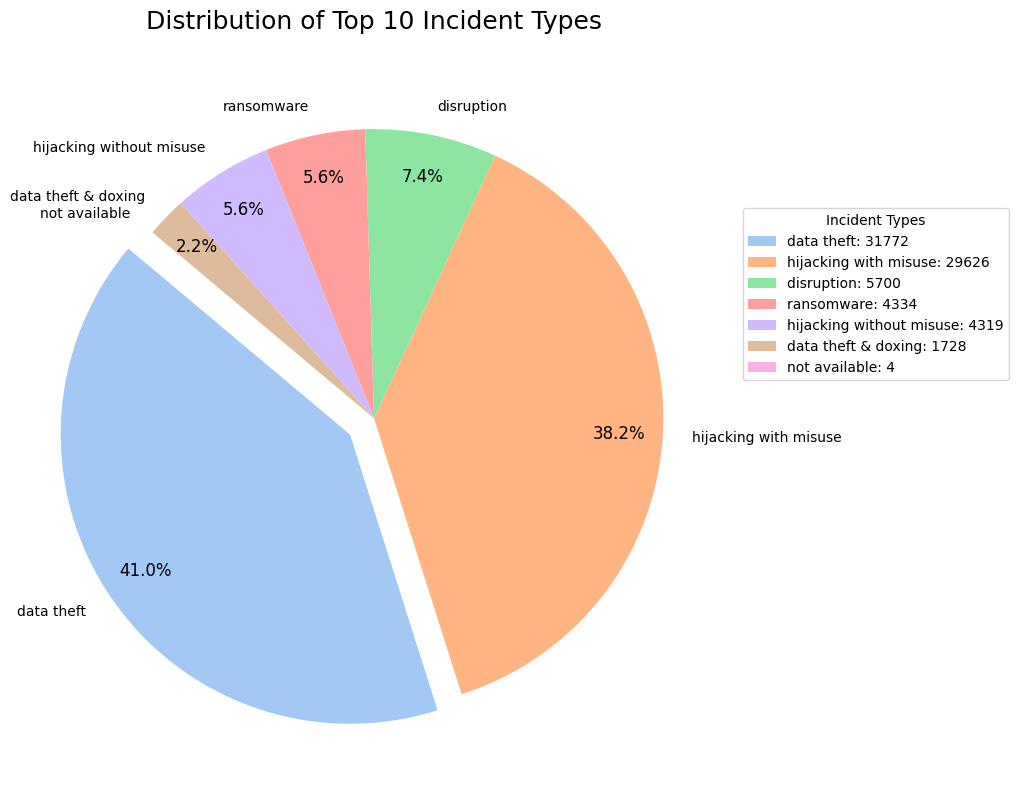

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


incident_type_counts = GCI_df['incident_type'].value_counts()
top_10_incident_types = incident_type_counts.head(10)
top_10_incident_types = top_10_incident_types[top_10_incident_types > 0]

lighter_colors = sns.color_palette("pastel", n_colors=len(top_10_incident_types)) 
plt.figure(figsize=(12, 8))

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

wedges, texts, autotexts = plt.pie(
    top_10_incident_types, 
    labels=top_10_incident_types.index, 
    autopct=autopct_format,
    startangle=140, 
    colors=lighter_colors, 
    explode=[0.1 if i == 0 else 0 for i in range(len(top_10_incident_types))],
    pctdistance=0.85 
)

for autotext in autotexts:
    autotext.set_fontsize(12) 
    autotext.set_color('black')  

for text in texts:
    text.set_fontsize(10) 

plt.title('Distribution of Top 10 Incident Types', fontsize=18, pad=20)
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1, 0.8), 
    labels=[f"{label}: {count}" for label, count in zip(top_10_incident_types.index, top_10_incident_types.values)],
    fontsize=10,
    title="Incident Types"
)
plt.tight_layout()
plt.savefig('top_10_incident_type_pie_chart_lighter_shades.png', dpi=300, bbox_inches='tight')
plt.show()

Purpose of the Code
- Visualizes the distribution of incident types using a pie chart.
- Highlights the top 10 incident types and groups the remaining types into an "Others" category.
- Enhances readability by exploding the largest slice and adding a donut chart effect.

Insights from the Code
- Top Incident Types:The chart shows the relative proportions of the top 10 incident types.
- The "Others" category aggregates less frequent incident types, providing a comprehensive view.

- Readable Visualization:Exploding the largest slice emphasizes the most frequent incident type.The donut chart effect improves aesthetics and focuses attention on the data.

- Helps identify the most common incident types, which can guide prioritization in analysis or decision-making.



## 2. Bar Charts

/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/585625499.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/585625499.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


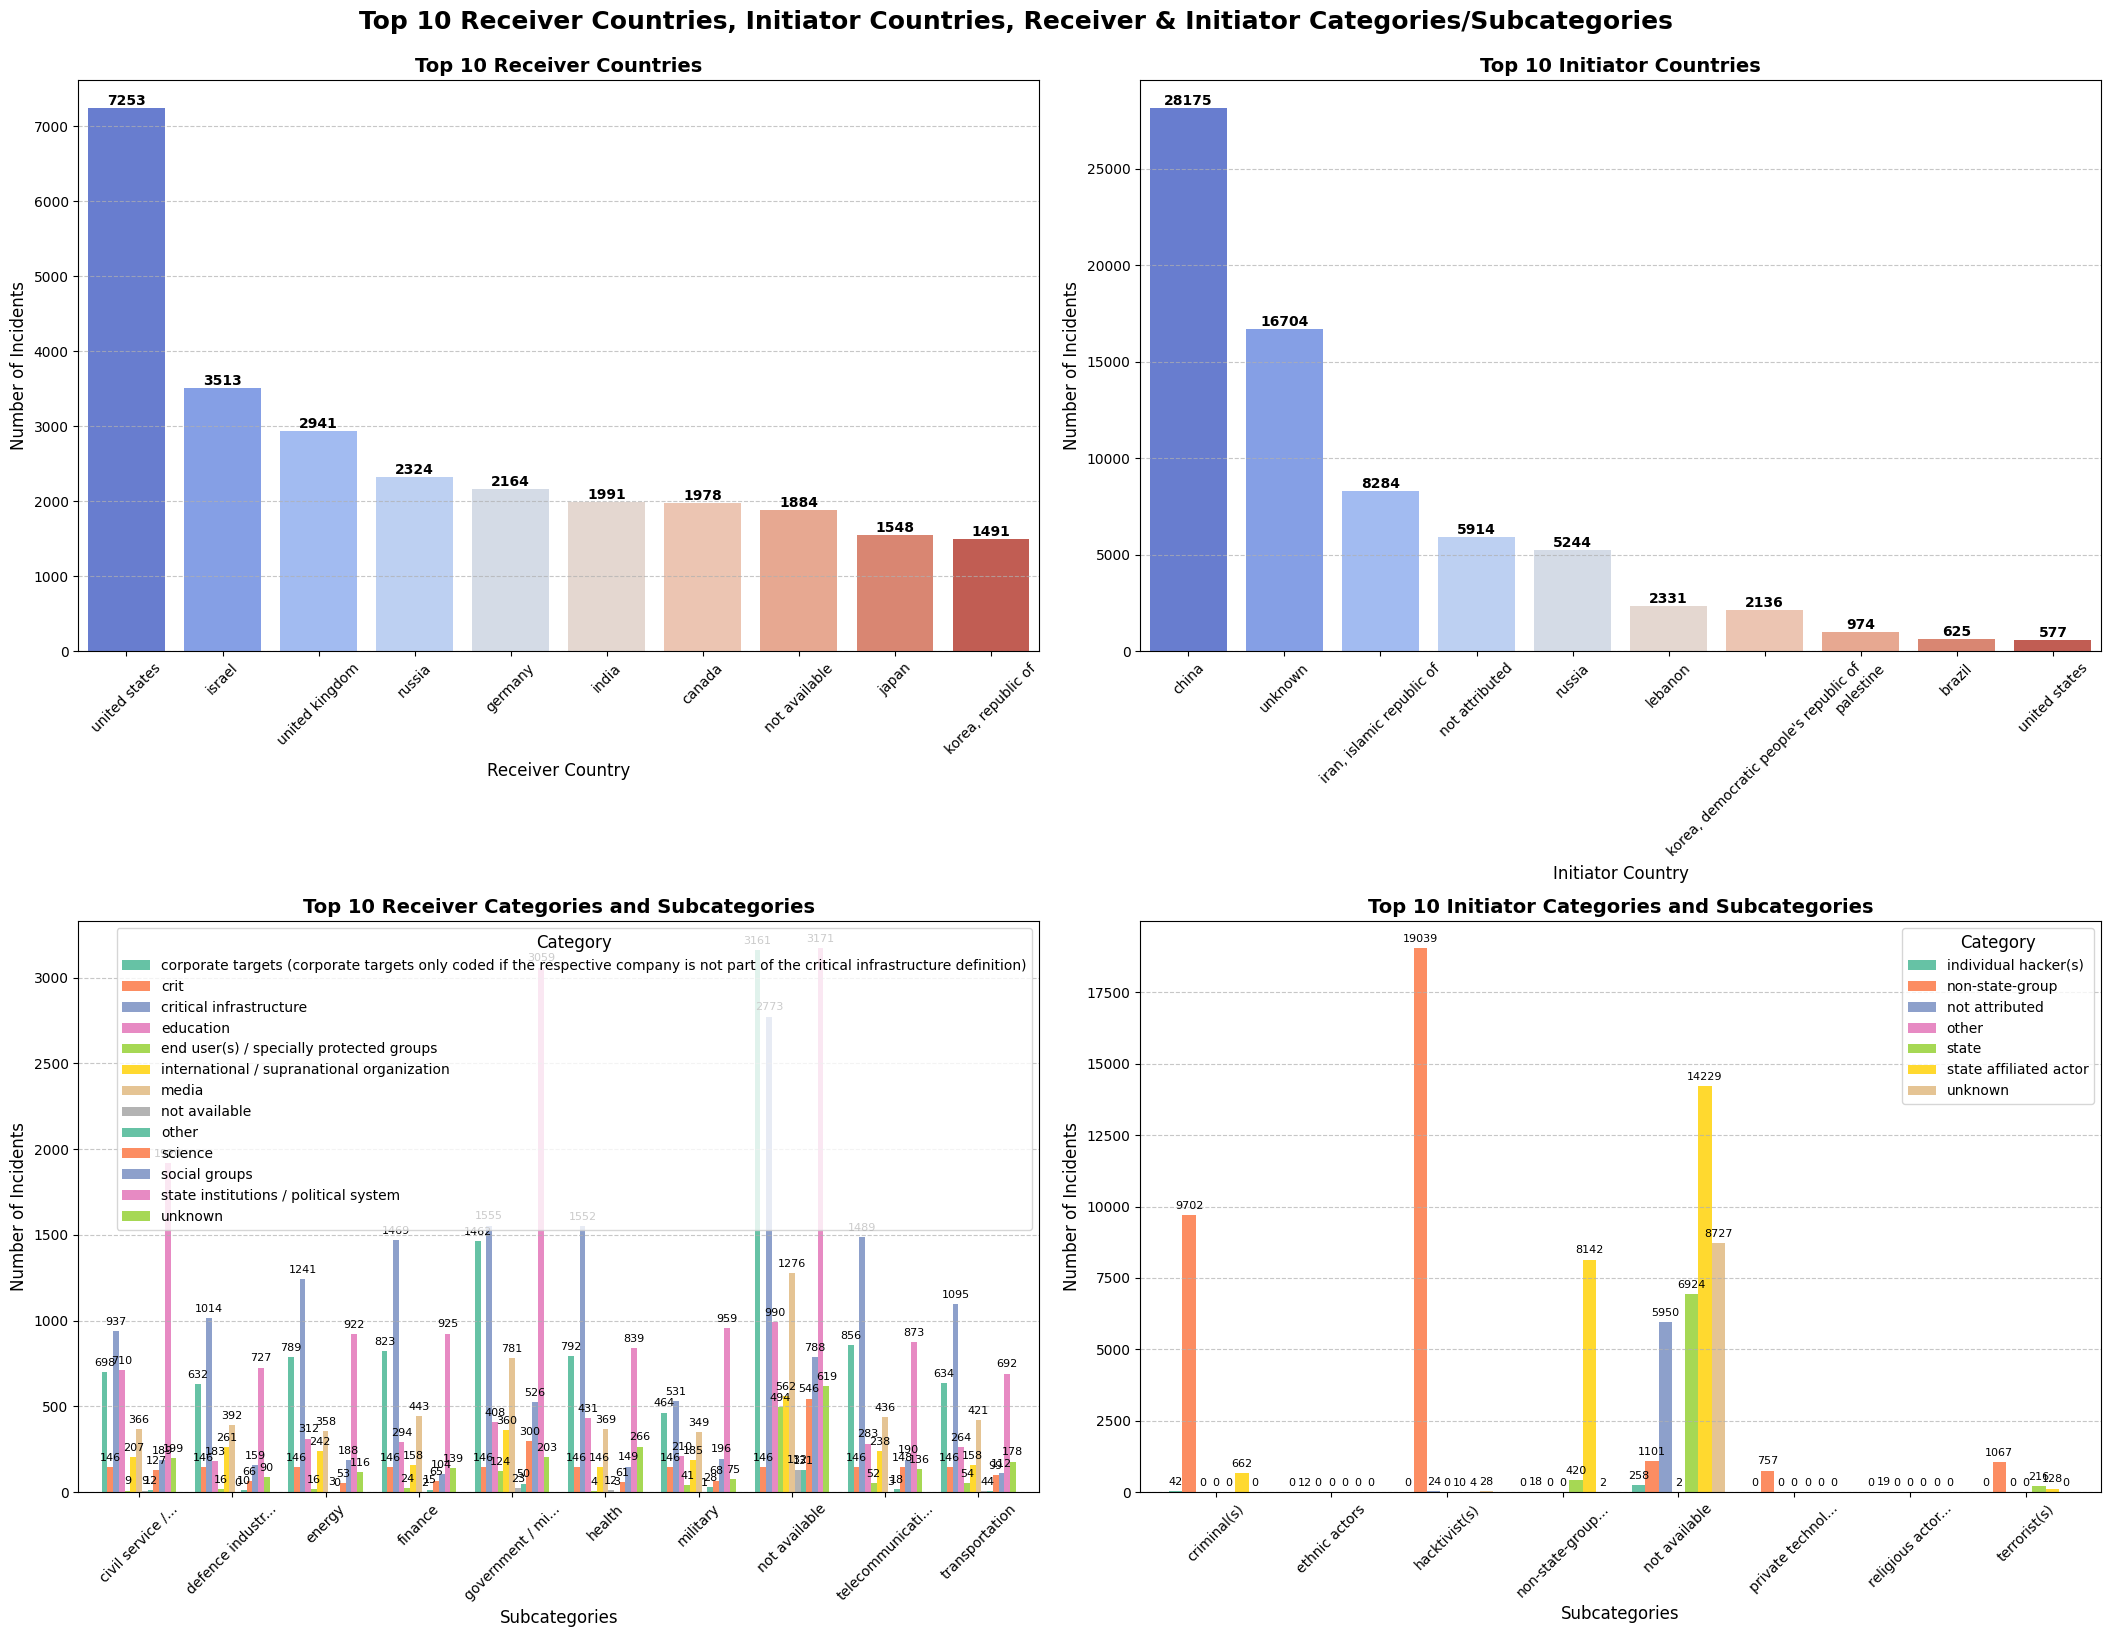

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def shorten_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

def plot_grouped_bar_chart(ax, data, category_column, subcategory_column, title, xlabel, ylabel, rotation=45):


    grouped_data = data.groupby([category_column, subcategory_column]).size().reset_index(name='count')

    top_10_subcategories = grouped_data.groupby(subcategory_column)['count'].sum().nlargest(10).index

    grouped_data = grouped_data[grouped_data[subcategory_column].isin(top_10_subcategories)]

    pivot_data = grouped_data.pivot(index=subcategory_column, columns=category_column, values='count').fillna(0)

    pivot_data.index = [shorten_label(label) for label in pivot_data.index]

    pivot_data.plot(
        kind='bar', 
        ax=ax, 
        width=0.8, 
        color=sns.color_palette("Set2", n_colors=len(pivot_data.columns))  
    )
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', rotation=rotation)
    ax.legend(title="Category", fontsize=10, title_fontsize=12)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

def plot_top_10_bar_chart(ax, data, column, title, xlabel, ylabel, rotation=45):
    top_10 = data[column].value_counts().nlargest(10)
    
    sns.barplot(
        x=top_10.index, 
        y=top_10.values, 
        ax=ax, 
        palette='coolwarm'
    )
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', rotation=rotation)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axes = plt.subplots(2, 2, figsize=(22, 16))  

plot_top_10_bar_chart(
    axes[0, 0], 
    GCI_df, 
    'receiver_country', 
    'Top 10 Receiver Countries', 
    'Receiver Country', 
    'Number of Incidents'
)
plot_top_10_bar_chart(
    axes[0, 1], 
    GCI_df, 
    'initiator_country', 
    'Top 10 Initiator Countries', 
    'Initiator Country', 
    'Number of Incidents'
)
plot_grouped_bar_chart(
    axes[1, 0], 
    GCI_df, 
    'receiver_category', 
    'receiver_subcategory', 
    'Top 10 Receiver Categories and Subcategories', 
    'Subcategories', 
    'Number of Incidents'
)
plot_grouped_bar_chart(
    axes[1, 1], 
    GCI_df, 
    'initiator_category', 
    'initiator_subcategory', 
    'Top 10 Initiator Categories and Subcategories', 
    'Subcategories', 
    'Number of Incidents'
)
plt.tight_layout()
plt.suptitle("Top 10 Receiver Countries, Initiator Countries, Receiver & Initiator Categories/Subcategories", fontsize=18, fontweight='bold', y=1.02)
plt.savefig('grouped_receiver_and_initiator_categories_and_subcategories_with_counts.png', dpi=300, bbox_inches='tight')
plt.show()

Purpose of the Code
- Creates a 2x2 grid of bar charts to visualize the top 10 values for the following categories:
    - Receiver Countries: Top 10 countries receiving incidents.
    - Initiator Countries: Top 10 countries initiating incidents.
    - Receiver Categories & Sub: Top 10 categories of receivers.
    - Initiator Categories & Sub: Top 10 categories of initiators.
    - Highlights EU states in the labels by appending (EU) to their names.

- Displays the count of incidents on top of each bar for better readability. Saves the resulting visualization as a high-resolution image.

Insights from the Code

- Granular Analysis: Provides a breakdown of the most affected receiver countries and categories.
- Highlights the most active initiator countries and categories. 
- EU State Identification: Clearly identifies EU states in the charts, making it easier to analyze their involvement.
- Comparative Analysis: Enables comparison between receiver and initiator countries/categories. Helps identify patterns and trends in incident distribution.
- Guides decision-making by highlighting the most affected regions and categories.
Presentation-Ready:




## 3. HeatMap

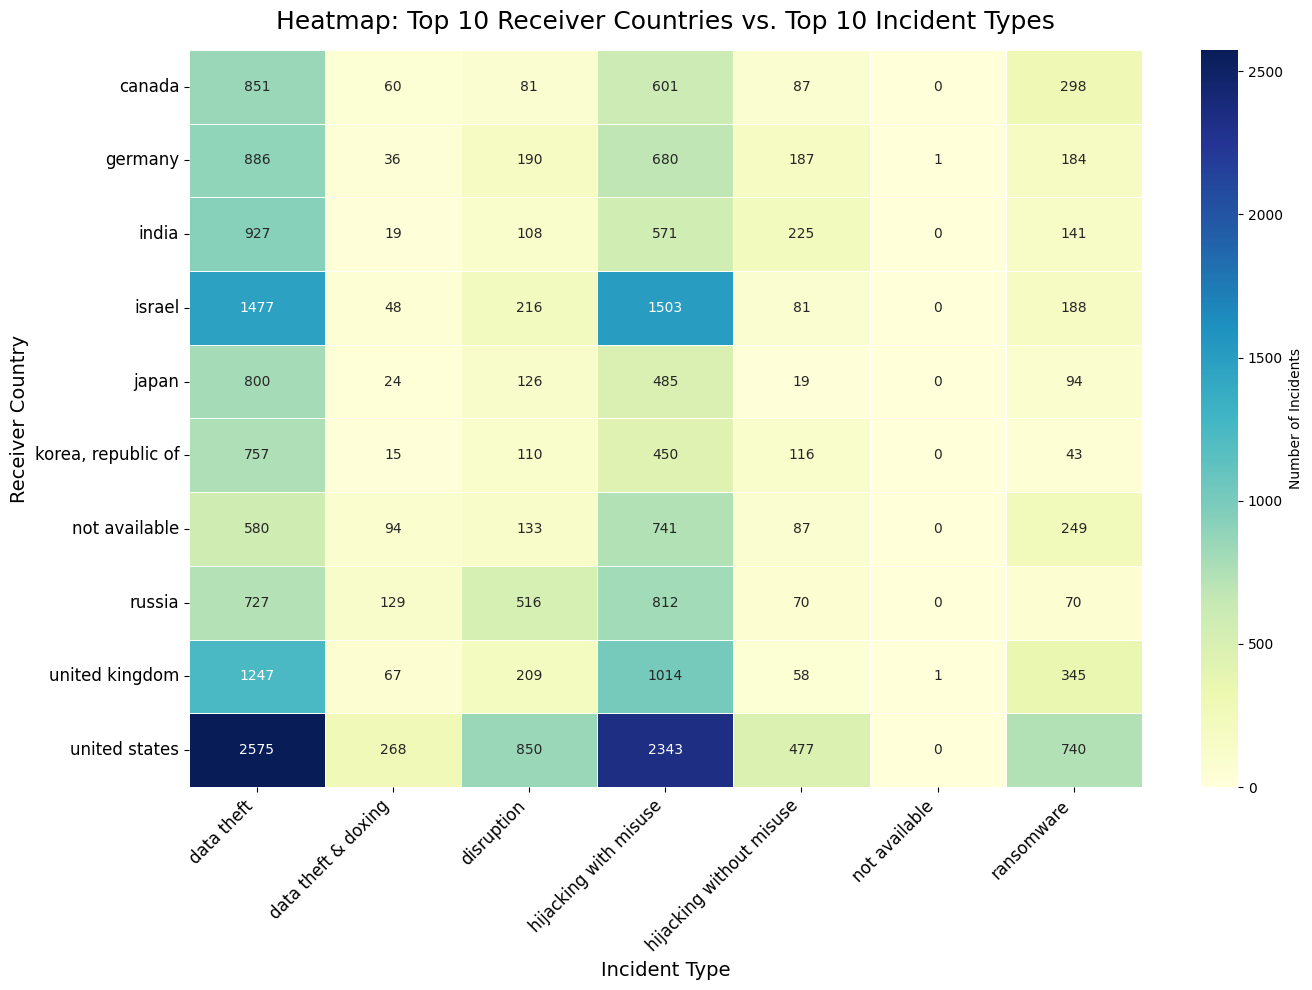

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10_countries = GCI_df['receiver_country'].value_counts().head(10).index

top_10_incident_types = GCI_df['incident_type'].value_counts().head(10).index

filtered_GCI_df = GCI_df[GCI_df['receiver_country'].isin(top_10_countries) & GCI_df['incident_type'].isin(top_10_incident_types)]

heatmap_data = filtered_GCI_df.pivot_table(index='receiver_country', columns='incident_type', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10)) 
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    annot=True, 
    fmt='d', 
    linewidths=0.5, 
    cbar_kws={'label': 'Number of Incidents'}
)
plt.title('Heatmap: Top 10 Receiver Countries vs. Top 10 Incident Types', fontsize=18, pad=15)
plt.xlabel('Incident Type', fontsize=14)
plt.ylabel('Receiver Country', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_top_10_countries_and_incident_types.png', dpi=300)
plt.show()

Purpose of the Code
- Identifies the top 10 receiver countries and top 10 incident types by frequency.
- Filters the dataset to include only these top countries and incident types.
- Creates a heatmap to visualize the frequency of incidents by country and type.

Insights from the Code
- Highlights the relationship between the most affected countries and the most frequent incident types.
- Shows which countries are most impacted by specific types of incidents.

Usefulness
- Provides a clear visual representation of the interaction between countries and incident types.
- Helps stakeholders focus on high-priority areas for mitigation and response.
- The saved heatmap can be used in reports or presentations for better communication.

## 4. Line Chart

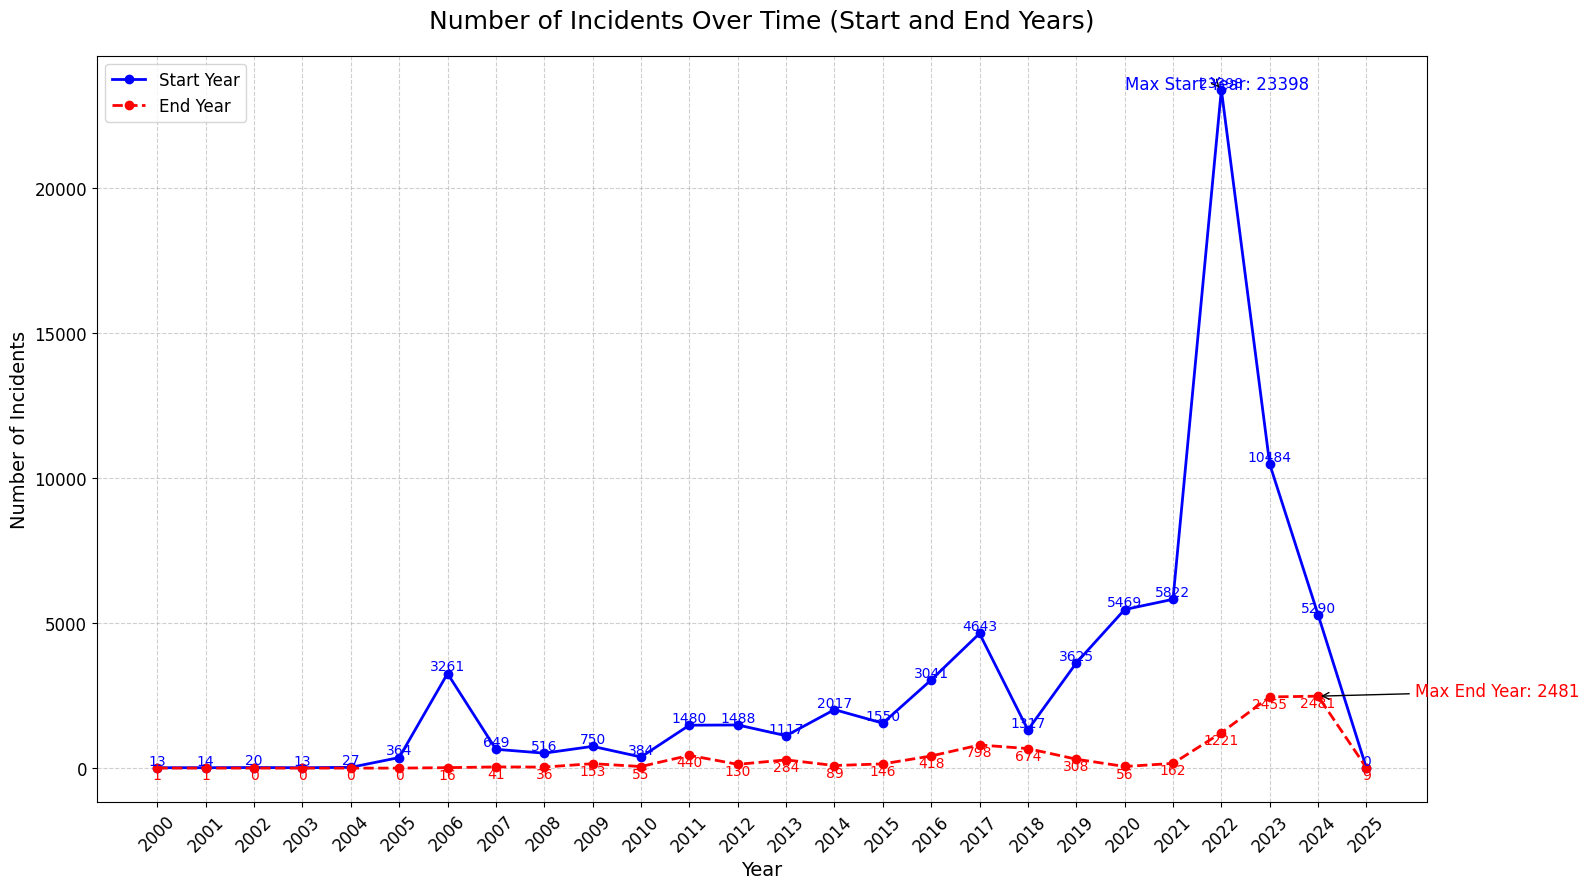

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


start_year_counts = GCI_df['start_date'].dt.year.value_counts().sort_index()
end_year_counts = GCI_df['end_date'].dt.year.value_counts().sort_index()


all_years = sorted(set(start_year_counts.index).union(set(end_year_counts.index)))


start_year_counts_aligned = [start_year_counts.get(year, 0) for year in all_years]
end_year_counts_aligned = [end_year_counts.get(year, 0) for year in all_years]

plt.figure(figsize=(16, 9)) 
plt.plot(
    all_years, 
    start_year_counts_aligned, 
    marker='o', 
    linestyle='-', 
    color='blue', 
    label='Start Year', 
    linewidth=2
)
plt.plot(
    all_years, 
    end_year_counts_aligned, 
    marker='o', 
    linestyle='--', 
    color='red', 
    label='End Year', 
    linewidth=2
)
plt.title('Number of Incidents Over Time (Start and End Years)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(all_years, rotation=45, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

for year, count in zip(all_years, start_year_counts_aligned):
    plt.text(year, count + 3, str(count), fontsize=10, ha='center', va='bottom', color='blue')
for year, count in zip(all_years, end_year_counts_aligned):
    plt.text(year, count - 3, str(count), fontsize=10, ha='center', va='top', color='red') 


max_start_year = max(start_year_counts_aligned)
max_end_year = max(end_year_counts_aligned)
plt.annotate(
    f"Max Start Year: {max_start_year}", 
    xy=(all_years[start_year_counts_aligned.index(max_start_year)], max_start_year), 
    xytext=(all_years[start_year_counts_aligned.index(max_start_year)] - 2, max_start_year + 10),
    arrowprops=dict(facecolor='blue', arrowstyle='->'),
    fontsize=12, color='blue'
)
plt.annotate(
    f"Max End Year: {max_end_year}", 
    xy=(all_years[end_year_counts_aligned.index(max_end_year)], max_end_year), 
    xytext=(all_years[end_year_counts_aligned.index(max_end_year)] + 2, max_end_year - 10),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=12, color='red'
)
plt.tight_layout()
plt.savefig('incidents_over_time.png', dpi=300)
plt.show()

Purpose of the Code
- Combines unique years from start_year and end_year to create a unified timeline.
- Aligns incident counts for both start and end years with the combined timeline.
- Plots a time series showing the number of incidents over time for both start and end years.

Insights from the Code
- Visualizes trends in the number of incidents over time based on start and end years.
- Highlights differences between when incidents started and ended, providing insights into their duration.
- Labels data points for clarity, making it easier to interpret specific values.

Usefulness
- Helps identify patterns or trends in incidents over time.
- Provides a clear comparison between start and end year distributions.
- Useful for stakeholders to understand temporal dynamics and plan accordingly.


## 5. Box Plot

/var/folders/vk/hr1shnhn29bd_67yn_dv6_3c0000gn/T/ipykernel_16293/4113550535.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


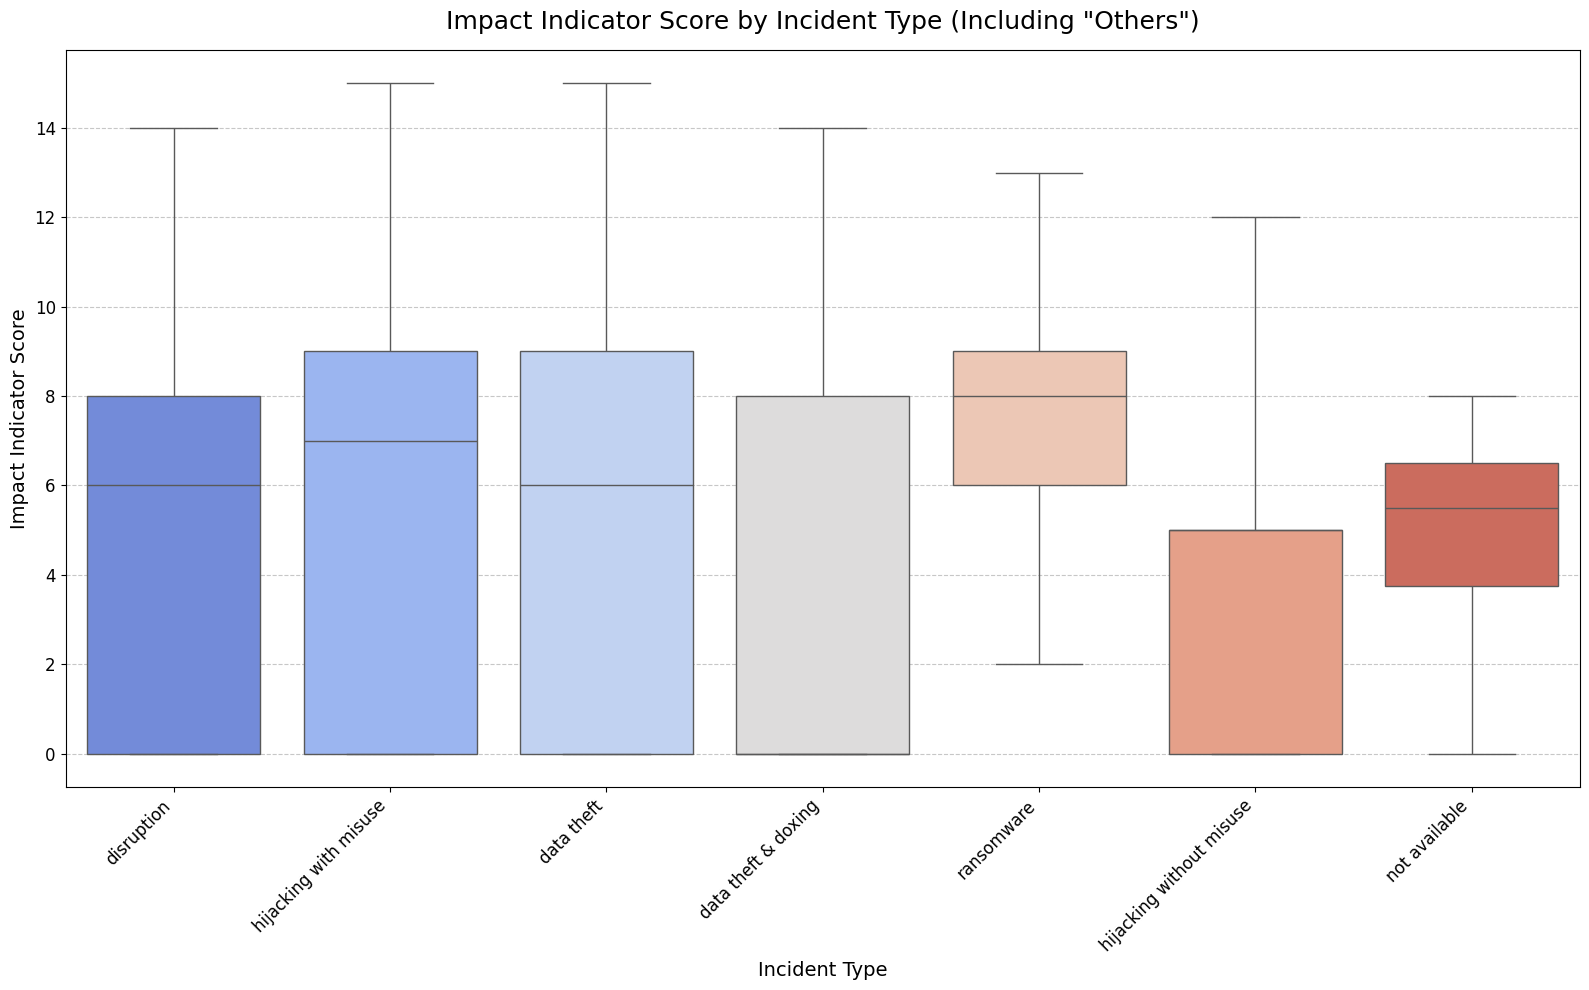

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_incident_types = GCI_df['incident_type'].value_counts().head(10).index
GCI_df['incident_type_grouped'] = GCI_df['incident_type'].apply(
    lambda x: x if x in top_10_incident_types else 'Others'
)

plt.figure(figsize=(16, 10))
sns.boxplot(
    data=GCI_df, 
    x='incident_type_grouped', 
    y='impact_indicator_score', 
    palette='coolwarm', 
    showfliers=False 
)
plt.title('Impact Indicator Score by Incident Type (Including "Others")', fontsize=18, pad=15)
plt.xlabel('Incident Type', fontsize=14)
plt.ylabel('Impact Indicator Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.savefig('impact_by_incident_type_with_others.png', dpi=300)
plt.show()

Purpose of the Code
- Identifies the top 10 incident types by frequency and groups all others into an "Others" category.
- Creates a box plot to visualize the distribution of impact indicator scores for each incident type, including "Others".
- Hides outliers for a cleaner and more focused visualization.

Insights from the Code
- Highlights the variability and central tendency of impact indicator scores for each incident type.
- Shows which incident types tend to have higher or lower impact scores.
- The "Others" category provides a summary of less frequent incident types.

Usefulness
- Helps compare the impact severity across different incident types.
- Provides actionable insights for prioritizing incident types with higher impacts.
- The saved plot can be used in reports or presentations for better communication.


# High-Level Analysis


Word Count : 424

This notebook provides a detailed analysis of global cyber incidents, focusing on their types, geographic distribution, timeframes, and impact scores. The study involved cleaning the dataset, performing exploratory data analysis (EDA), and creating visualizations to uncover meaningful patterns and trends. These insights aim to support organizations, policymakers, and cybersecurity professionals in addressing cyber threats.

Key Information About the Data

The dataset spans from 2000 to 2025 and includes attributes such as incident_type, receiver_country, initiator_country, start_date, end_date, and impact_indicator_score. Data cleaning involved removing duplicates, addressing missing values, and standardizing text fields. These steps ensured the dataset was ready for analysis and visualization, enabling the identification of trends, patterns, and relationships. The dataset provides a comprehensive view of cyber incidents, offering insights into their frequency, nature, and impact.

Statistically Significant Results

Incident Types:
    - Data Theft is the most frequently reported incident type, accounting for 41% of all incidents. Other significant categories include Hijacking with Misuse and Disruption, which together represent a substantial portion of the dataset.

Impact Scores:
    - The average impact indicator score is 5.2, with a standard deviation of 4.2, indicating moderate variability. Data Theft incidents tend to have higher impact scores, while Hijacking with Misuse shows less variability.

Temporal Trends:
    - The number of incidents has steadily increased, with a sharp rise in 2020, likely due to increased reliance on digital platforms during the COVID-19 pandemic. Some incidents span multiple years, reflecting prolonged impacts.

Geographic Insights:
    - The United States is the most affected country, followed by Germany and China. Ransomware is more prevalent in Europe, while Data Theft dominates in North America.

Key Insights from Visualizations

- Pie Chart: Highlights the dominance of Data Theft and Hijacking with Misuse.
- Bar Charts:
    - Top 10 Receiver Countries: The United States leads, followed by Germany and China.
    - Top 10 Initiator Countries: Russia and China are prominent initiators, followed by North Korea and Iran.
    - Top 10 Receiver Categories: Finance, Healthcare, and Government are the most targeted sectors.
    - Top 10 Initiator Categories: Organized crime groups and hacktivists dominate, followed by state-sponsored actors.
- Heatmap: Shows Data Theft is globally widespread, while Ransomware is region-specific.
- Line Chart: Demonstrates a steady rise in incidents, with spikes in 2015 and 2020.
- Box Plot: Highlights variability in impact scores, with Disruption incidents showing the greatest disparity.

Conclusion

This analysis highlights the growing prevalence of Data Theft and the steady rise in cyber incidents over time. Geographic patterns emphasize the need for region-specific mitigation strategies, while impact scores provide a basis for prioritizing responses. These findings can guide organizations and policymakers in addressing the evolving threat landscape.